# ML1. Machine Learning Intro (Overview)

## Iris의 품종을 분류
0. 문제 정의 및 방법 결정
1. 데이터 불러오기
2. 훈련(Training)데이터와 답안(Validation) 데이터 로 분류
3. 데이터 살펴보기
4. 모델 생성
5. 예측
6. 모델 평가
--- 
- 모델의 적합성: Baseline 수
- 존재해야 모델을 수정 및 개선할 수 있음
- 모델: 선형방정식 y=aX+b
- 분류와 회귀는 평가 방식이 다르다
    - 회귀는 평가가 박하다...(평가가 디테일 해야한다)
    - 모델 평가
        - 평가 기준이 너무 상이하지 않아야함
        - 평가에 따른 모델 선정
        - 단하나의 솔루션을 선호
        - 모델 설명이 필요 (수식을 말로...)
---
A. Overfitting (지도학습의 문제점)<br>
    - sol: 문제에 너무 적중 (해결이 힘듬) <br>
B. Underfitting (비지도학습의 문제점)<br>
    - sol: need more data <br>
C. General Model (Wannabe) <br>

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#!pip install imageio

In [9]:
import mglearn

In [20]:
import mglearn.plot_helpers

In [22]:
from preamble import *

## 2.1 데이터 불러오기 (적재)

In [24]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [29]:
# dict 의 key 값
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [31]:
# pg 39
print(iris_dataset.DESCR)
# 수치를 보고 세가지 품종 분류 (다진 분류) 

#행: 관측값, 종속 변인
#열: 독립 변인

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [32]:
print(iris_dataset.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [34]:
# 데이터의 전체 크기
print(iris_dataset["data"].shape) # numpy 함수 .shape

(150, 4)


품종에 대한 답안은..?

at 'target'

In [36]:
# 답안의 전체 크기
print(iris_dataset["target"].shape)

(150,)


- `data`  : (150,4)
- `target`: (150,)
- 즉 `data`+`target` 시 전체 데이터 완성 (150,5)

## 2.2 데이터 나누기

In [39]:
# train_test_split: 균등하게 random하게 나누는 함수
# random_state: Algorithm 학습 시 0으로 설정, 검증시 뺀다 (default: 날짜를 숫자로 치환값이 들어간다)
from sklearn.model_selection import train_test_split
# X: 문제 y: 답안
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0)

In [40]:
print(X_train.shape, y_train.shape)

(112, 4) (112,)


## 2.3 데이터 살펴보기
### 경향성 가능성

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

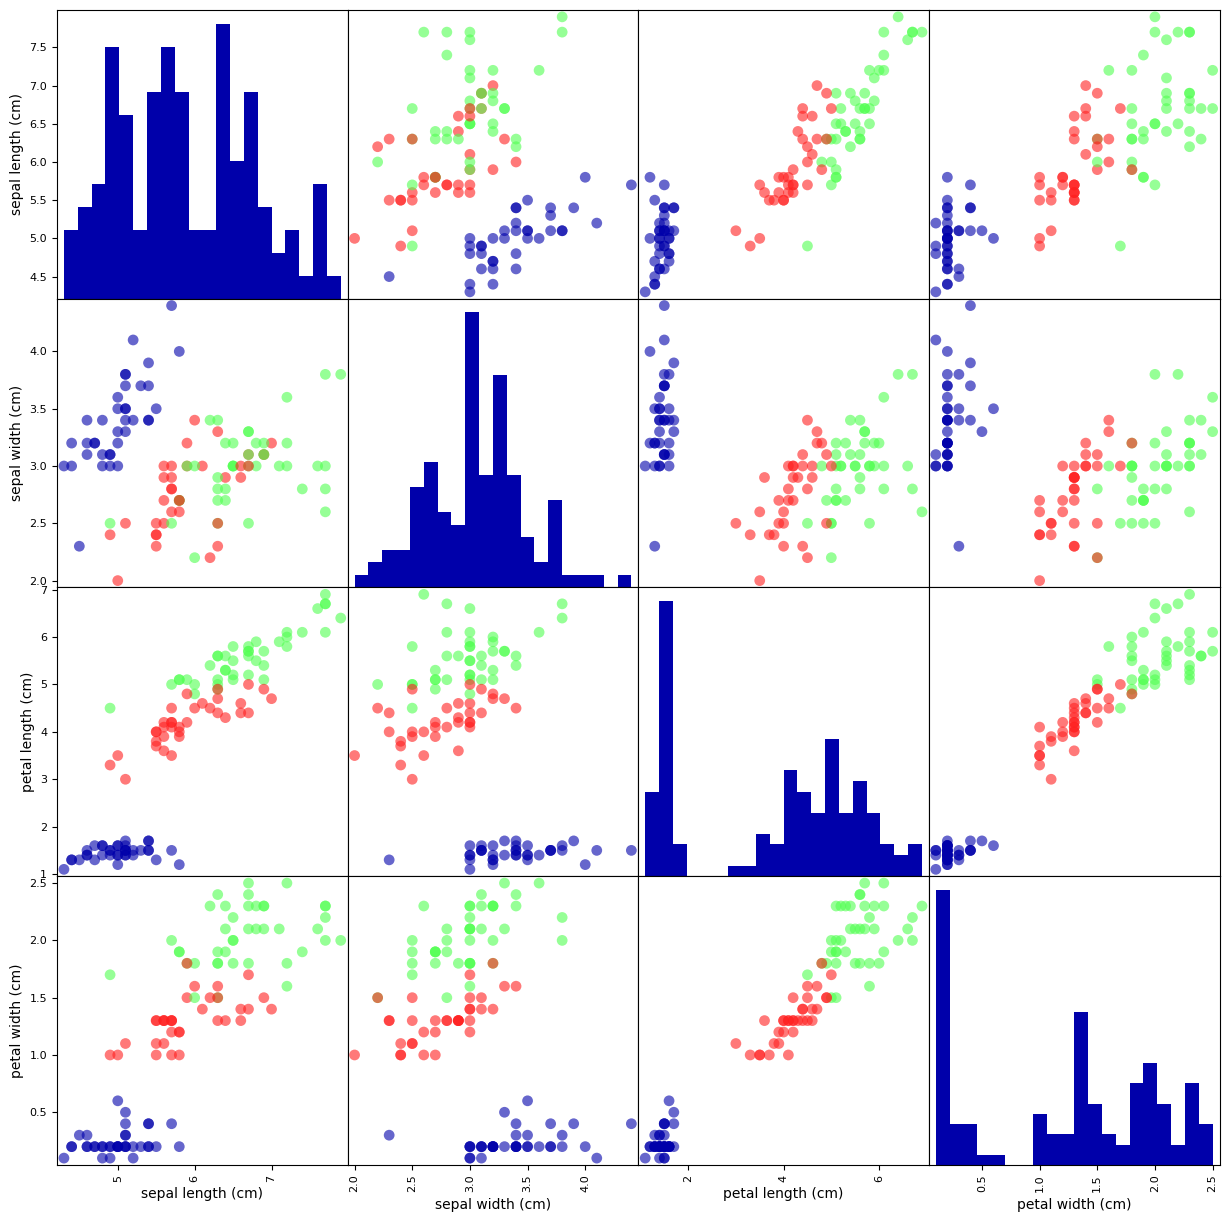

In [42]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# 데이터 프레임을 사용하여 y_train을 따라 색으로 구분된 산점도 행렬 생성
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15), marker='o',
                           hist_kwds={'bins':20}, s=60, alpha=0.6, cmap=mglearn.cm3)

## 2.4 모델 생성

In [43]:
 from sklearn.neighbors import KNeighborsClassifier
# 객체를 만들어서 사용해야한다
knn = KNeighborsClassifier(n_neighbors=1) # 생성자 KNC(init value)
# 학습(문제지, 답안지)
knn.fit(X_train, y_train) # 모델 생성

KNeighborsClassifier(n_neighbors=1)

## 2.5 모델 평가

In [45]:
y_pred = knn.predict(X_test)
# X_test에 대한 예측값
y_pred 

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [47]:
print(y_pred == y_test) # 얼마나 정확한지 인지 불가하므로 아래처럼 값을 구해야함
print(np.mean(y_pred == y_test))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False]
0.9736842105263158
